# Use ASF Search to find SAR data from Sentinel-1

In [1]:
import asf_search as asf
import folium
import numpy as np

In [2]:
asf.__version__

'8.0.1'

## Perform first quick search

In [3]:
search_params = {
    "platform": asf.PLATFORM.SENTINEL1,
    "maxResults": 20,
}

In [4]:
count = asf.search_count(**search_params)
print(f"Found {count:,} results for given input parameters")

Found 171,678,948 results for given input parameters


In [5]:
results = asf.search(**search_params)

### Mess around with ASF search results

In [6]:
print(type(results))
print("Results: ", *results.__dict__.keys(), sep="\n\t")
print(type(results.data))
print(len(results.data))
print(type(results.data[0]))
print("Data[0]: ", *results.data[0].__dict__.keys(), sep="\n\t")
print("Data[0].meta: ", *results.data[0].meta.keys(), sep="\n\t")
print("Data[0].properties: ", *results.data[0].properties.keys(), sep="\n\t")
print("Data[0].properties.polarization: ", results.data[0].properties["polarization"], sep="\n\t")
print("Data[0].properties.orbit: ", results.data[0].properties["orbit"], sep="\n\t")
print("Data[0].properties.processingDate: ", results.data[0].properties["processingDate"], sep="\n\t")
print("Data[0].properties.lat&long: ", results.data[0].properties["centerLat"], results.data[0].properties["centerLon"], sep="\n\t")
print("Data[0].geometry: ", *results.data[0].geometry.items(), sep="\n\t")

<class 'asf_search.ASFSearchResults.ASFSearchResults'>
Results: 
	data
	searchOptions
	searchComplete
<class 'list'>
20
<class 'asf_search.Products.S1Product.S1Product'>
Data[0]: 
	meta
	umm
	properties
	geometry
	baseline
	session
Data[0].meta: 
	concept-type
	concept-id
	revision-id
	native-id
	collection-concept-id
	provider-id
	format
	revision-date
Data[0].properties: 
	centerLat
	centerLon
	stopTime
	fileID
	flightDirection
	pathNumber
	processingLevel
	url
	startTime
	sceneName
	browse
	platform
	bytes
	md5sum
	frameNumber
	granuleType
	orbit
	polarization
	processingDate
	sensor
	groupID
	pgeVersion
	fileName
	beamModeType
	s3Urls
Data[0].properties.polarization: 
	VV+VH
Data[0].properties.orbit: 
	56405
Data[0].properties.processingDate: 
	2024-11-04T12:35:44Z
Data[0].properties.lat&long: 
	46.2131
	79.1128
Data[0].geometry: 
	('coordinates', [[[80.4489, 47.479], [77.2056, 47.1947], [77.8421, 44.9267], [80.9528, 45.2062], [80.4489, 47.479]]])
	('type', 'Polygon')


In [7]:
print(results[0])

{
  "geometry": {
    "coordinates": [
      [
        [
          80.4489,
          47.479
        ],
        [
          77.2056,
          47.1947
        ],
        [
          77.8421,
          44.9267
        ],
        [
          80.9528,
          45.2062
        ],
        [
          80.4489,
          47.479
        ]
      ]
    ],
    "type": "Polygon"
  },
  "properties": {
    "beamModeType": "IW",
    "browse": null,
    "bytes": 1903866818,
    "centerLat": 46.2131,
    "centerLon": 79.1128,
    "fileID": "S1A_IW_RAW__0SDV_20241104T123544_20241104T123621_056405_06E94C_6864-RAW",
    "fileName": "S1A_IW_RAW__0SDV_20241104T123544_20241104T123621_056405_06E94C_6864.zip",
    "flightDirection": "ASCENDING",
    "frameNumber": 147,
    "granuleType": "SENTINEL_1A_FRAME",
    "groupID": "S1A_IWDV_0147_0154_056405_158",
    "md5sum": "13a9ebe253ca8105912ed73f527f0a77",
    "orbit": 56405,
    "pathNumber": 158,
    "pgeVersion": null,
    "platform": "Sentinel-1A",
    "po

## Geographic Search

### Define Area of Interest - Rogue Valley, Oregon

In [8]:
# Created using Vertex search click on map
aoi = "POLYGON((-123.0252 42.3902,-122.5958 42.1035,-122.4631 42.155,-122.8968 42.4694,-123.0252 42.3902))"

In [9]:
search_params = {
    "platform": asf.PLATFORM.SENTINEL1,
    "maxResults": 200,
    "start": "2018-06-01",
    "end": "2018-06-07",
    "processingLevel": asf.PRODUCT_TYPE.SLC,
}

In [10]:
# Count results without geometry filter
count_results = asf.search_count(**search_params)
print(f"Found {count_results:,} results for given input parameters")

Found 5,445 results for given input parameters


### Perform Geometric Search

In [11]:
geo_results = asf.geo_search(intersectsWith=aoi, **search_params)
print(f"({len(geo_results)}) results found")

(2) results found


In [12]:
print(geo_results[0].properties["centerLat"], geo_results[0].properties["centerLon"])
latest_result_date = geo_results[0].properties["processingDate"]
print(f"{latest_result_date = }")

42.0993 -122.138
latest_result_date = '2018-06-06T14:14:41Z'


### Find `stack` of results to compare over time

In [13]:
stack = geo_results[0].stack()

print(f"{len(stack)} product results found in stack")

for i, r in enumerate(stack):
    if "2018-06-06" in r.properties["processingDate"]:
        print(f"({i}): {r.properties["processingDate"]}\t{r.properties['temporalBaseline']}")
    if r.properties["processingDate"] == latest_result_date:
        print(f"({i}): {r.properties["processingDate"]}\t{r.properties['temporalBaseline']}")
        break

273 product results found in stack
(76): 2018-06-06T14:14:41Z	0
(76): 2018-06-06T14:14:41Z	0


In [14]:
for i in range(25):
    print(f"{stack[i].properties["processingDate"]}: {stack[i].properties["temporalBaseline"]}")
i = -1
print(f"{stack[i].properties["processingDate"]}: {stack[i].properties["temporalBaseline"]}")

2015-02-22T14:14:31Z: -1200
2015-02-22T14:14:06Z: -1200
2015-03-06T14:14:30Z: -1188
2015-03-18T14:14:31Z: -1176
2015-03-30T14:14:32Z: -1164
2015-03-30T14:14:06Z: -1164
2015-04-11T14:14:32Z: -1152
2015-04-11T14:14:07Z: -1152
2015-04-23T14:14:33Z: -1140
2015-04-23T14:14:07Z: -1140
2015-06-10T14:14:30Z: -1092
2015-07-04T14:14:31Z: -1068
2015-07-28T14:14:32Z: -1044
2015-08-21T14:14:34Z: -1020
2015-09-14T14:14:34Z: -996
2015-10-08T14:14:35Z: -972
2015-11-01T14:14:35Z: -948
2015-11-25T14:14:29Z: -924
2015-12-19T14:14:28Z: -900
2016-01-12T14:14:27Z: -876
2016-02-05T14:14:27Z: -852
2016-02-29T14:14:27Z: -828
2016-04-17T14:14:28Z: -780
2016-05-11T14:14:29Z: -756
2016-06-04T14:14:30Z: -732
2024-11-01T14:15:16Z: 2340


### Plot Result

In [15]:
product = geo_results[0]
footprint = product.geojson()

In [16]:
print(type(footprint))
print(footprint.keys())
print(type(footprint["geometry"]))
print(footprint["geometry"].keys())
print(footprint["geometry"]["coordinates"])
coords_np = np.array(footprint["geometry"]["coordinates"])
long_mean = np.mean(coords_np[:, :, 0])
lat_mean = np.mean(coords_np[:, :, 1])
print(f"Mean lat: {lat_mean:0.4f},\tMean long: {long_mean:0.4f}")

<class 'dict'>
dict_keys(['type', 'geometry', 'properties'])
<class 'dict'>
dict_keys(['coordinates', 'type'])
[[[-120.842606, 41.083923], [-120.418518, 42.702103], [-123.48111, 43.094376], [-123.8255, 41.476665], [-120.842606, 41.083923]]]
Mean lat: 41.8882,	Mean long: -121.8821


In [17]:
center_coords = [
    lat_mean, 
    long_mean,
]

In [18]:
m = folium.Map(location=center_coords, zoom_start=8)
folium.GeoJson(footprint, name="SAR Product Footprint").add_to(m)

In [19]:
m

### Try downloading result
Ensure session is correctly authenticated

In [20]:
session = asf.ASFSession()

In [21]:
# geo_results[0].download(path="../data/sentinel-1", session=session)

### Load result file

In [57]:
import rasterio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
from scipy.ndimage import zoom
from pathlib import Path

In [24]:
file_glob = glob.glob("../data/sentinel-1/*/measurement/*.tiff")

In [25]:
file_path = file_glob[0]
print(file_path)
file_path_p = Path(file_path)
kml_file = glob.glob(f"../data/sentinel-1/

../data/sentinel-1\S1A_IW_SLC__1SDV_20180606T141441_20180606T141508_022237_0267EB_EC03.SAFE\measurement\s1a-iw1-slc-vh-20180606t141443-20180606t141508-022237-0267eb-001.tiff


In [56]:
with rasterio.open(file_path, "r") as src:
    print(type(src))
    print(src.__dict__.items())
    print(f"{src.crs = }")
    sar_data = src.read(1)
    print(type(sar_data))
    print(sar_data.shape)
    transform = src.transform
    bounds = src.bounds
    print(f"{bounds = }")

<class 'rasterio.io.DatasetReader'>
dict_items([])
src.crs = None
<class 'numpy.ndarray'>
(13473, 21198)
bounds = BoundingBox(left=0.0, bottom=13473.0, right=21198.0, top=0.0)


In [ ]:
bound_coords = [[-120.842606,41.083923], [-123.825500,41.476665], [-123.481110,43.094376], [-120.418518,42.702103]]

In [33]:
print(f"{sar_data.nbytes / 1024 / 1024:0.1f} MB")

2179.0 MB


In [36]:
sar_data_magnitude = np.abs(sar_data)
print(sar_data_magnitude.dtype)

float32


In [53]:
plot_bounds = (bounds.left, bounds.right, bounds.bottom, bounds.top)

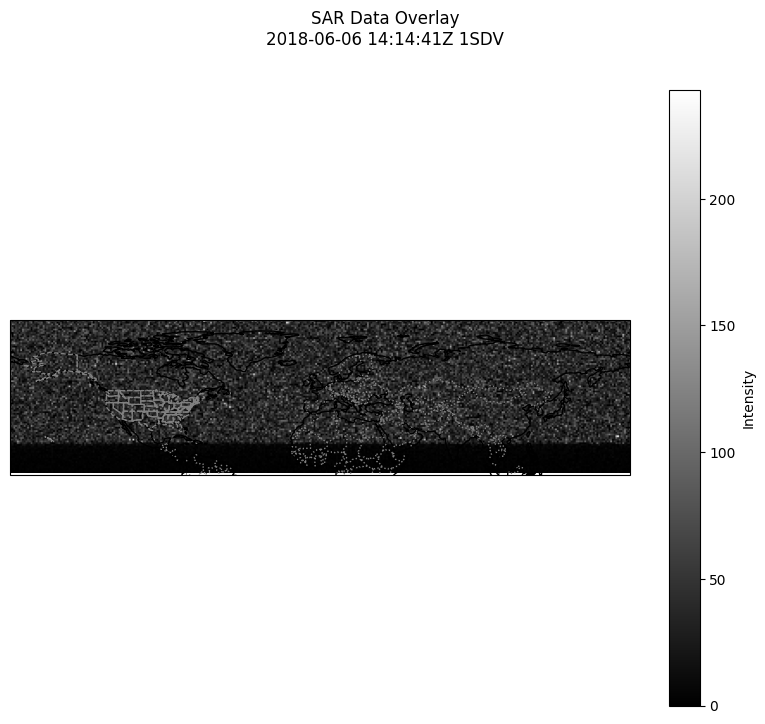

In [54]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(plot_bounds, crs=ccrs.PlateCarree())
img = ax.imshow(sar_data_magnitude, cmap="gray", extent=plot_bounds, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.STATES, linestyle="--", edgecolor="gray")

fig.suptitle("SAR Data Overlay\n2018-06-06 14:14:41Z 1SDV")
plt.colorbar(img, ax=ax, orientation="vertical", label="Intensity")
plt.show()

In [46]:
block_size = 10
downsample_factor = 1 / block_size
sar_data_zoom = zoom(sar_data_magnitude, downsample_factor)

In [47]:
print(f"{sar_data_zoom.nbytes / 1024 / 1024:0.1f} MB")

10.9 MB


In [41]:
def manual_downsample(data: np.ndarray, block_size: int) -> np.ndarray:
    orig_shape = data.shape
    new_shape = tuple([data.shape[0] // block_size, block_size, data.shape[1] // block_size, block_size])
    return data[:new_shape[0] * block_size, :new_shape[2] * block_size].reshape(new_shape).mean(axis=(1, 3))

In [48]:
sar_data_downsample = manual_downsample(sar_data_magnitude, block_size)

In [49]:
print(f"{sar_data_downsample.nbytes / 1024 / 1024:0.1f} MB")

10.9 MB


In [50]:
new_transform = rasterio.Affine(
    transform.a / downsample_factor, transform.b, transform.c,
    transform.d, transform.e / downsample_factor, transform.f,
)

In [51]:
new_width = int((bounds.right - bounds.left) / (transform.a * downsample_factor))
new_height = int((bounds.top - bounds.bottom) / (-transform.e * downsample_factor))

new_bounds = rasterio.transform.array_bounds(new_height, new_width, new_transform)
print(f"{bounds = }")
print(f"{new_bounds = }")

bounds = BoundingBox(left=0.0, bottom=13473.0, right=21198.0, top=0.0)
new_bounds = (0.0, 1347300.0, 2119800.0, 0.0)


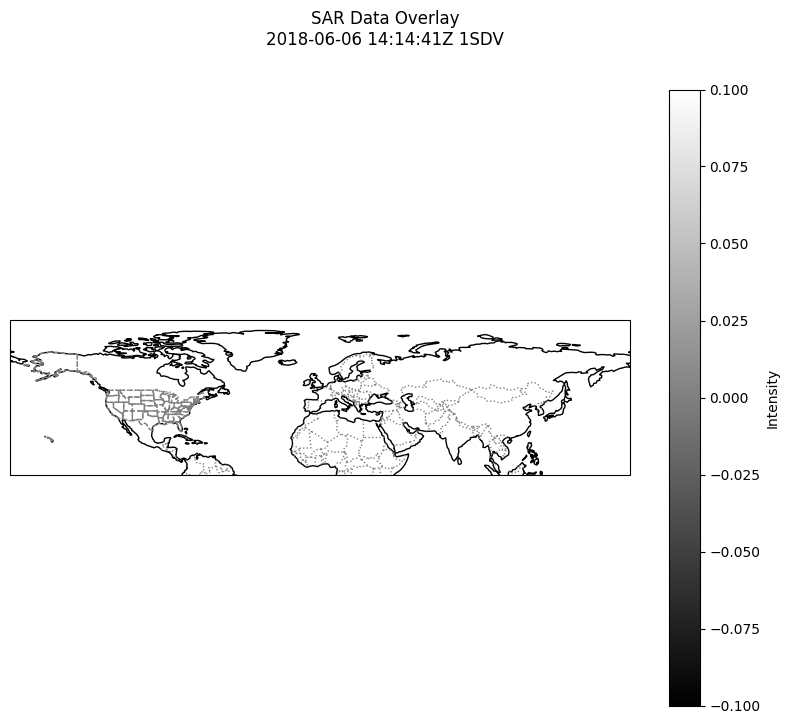

In [52]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(new_bounds, crs=ccrs.PlateCarree())
img = ax.imshow(sar_data_downsample, cmap="gray", extent=new_bounds, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.STATES, linestyle="--", edgecolor="gray")

fig.suptitle("SAR Data Overlay\n2018-06-06 14:14:41Z 1SDV")
plt.colorbar(img, ax=ax, orientation="vertical", label="Intensity")
plt.show()